# LSTM Forecast

### Step 1: Imports

In [2]:
# 📌 Step 1: Imports

%load_ext autoreload
%autoreload 2
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backend.data.mock_data import generate_mock_stock_data
from backend.models.model_lstm import preprocess_data_lstm, build_lstm_model




/home/softnut/Desktop/portfolio/stock-forecast-app/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-04 18:17:48.356284: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 18:17:48.361223: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 18:17:48.375896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754320668.400969   19297 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754320668.40896

In [3]:
# 📌 Step 2: Load and prepare data
df = generate_mock_stock_data()
df = df[['Date', 'Close']].rename(columns={"Date": "ds"})
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')



In [5]:

# 📌 Step 3: Preprocess for LSTM
time_steps = 60
X, y, scaler = preprocess_data_lstm(df,feature='Close', time_steps=time_steps)


In [6]:

# 📌 Step 4: Train LSTM model
model = build_lstm_model(X.shape[1:])
model.fit(X, y, epochs=5, batch_size=16, verbose=0)

2025-08-04 18:21:51.629060: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:

# 📌 Step 5: Forecast future prices
future_inputs = X[-1]
future_predictions = []
forecast_days = 10

for _ in range(forecast_days):
    pred = model.predict(np.expand_dims(future_inputs, axis=0))[0][0]
    future_predictions.append(pred)
    future_inputs = np.append(future_inputs[1:], [[pred]], axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/home/softnut/Desktop/portfolio/stock-forecast-app/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


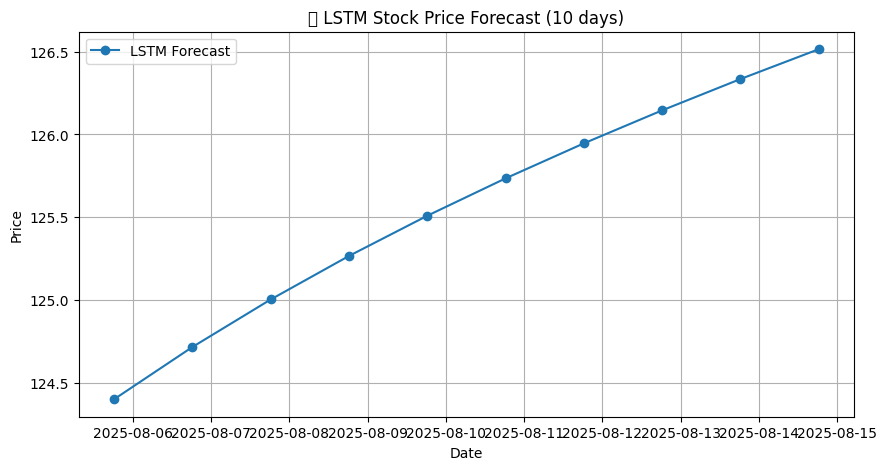

In [8]:

# 📌 Step 6: Inverse scale and plot
forecast = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
future_dates = pd.date_range(start=df['ds'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_days)

plt.figure(figsize=(10, 5))
plt.plot(future_dates, forecast, marker='o', label='LSTM Forecast')
plt.title("📈 LSTM Stock Price Forecast (10 days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()